In [51]:
import networkx as nx
import itertools
import pandas as pd
from itertools import chain
import numpy as np

In [55]:
df = pd.DataFrame({'name' : ['a', 'a', 'b', 'b', 'c'],
                   'identifier' : [1, 3, 1, 2, 3]})
df

,name,identifier
0,a,1
1,a,3
2,b,1
3,b,2
4,c,3


In [138]:
df = pd.DataFrame({'name' : ['a', 'a', 'b', 'b', 'c'],
                   'identifier' : [1, 3, 1, 2, 3]})
df_grouped = df.groupby('name')['identifier'].unique().reset_index(name='identifier')
# df_grouped['identifier'] = df_grouped['identifier'].apply(lambda x: tuple(x))
df_grouped_dict = dict(df_grouped.values)

In [65]:
test = group_dict_values(df_grouped_dict)
test

{'c , b , a': {1, 2, 3}}

In [20]:
L = [['John','Sayyed'], ['John' , 'Simon'] ,['bush','trump'],
     ['Sam','Suri','NewYork'],['Suri','Orlando','Canada']]
L

[['John', 'Sayyed'],
 ['John', 'Simon'],
 ['bush', 'trump'],
 ['Sam', 'Suri', 'NewYork'],
 ['Suri', 'Orlando', 'Canada']]

In [21]:
G = nx.Graph()

In [22]:
for l in L:
    nx.add_path(G, l)
list(nx.connected_components(G))



[{'John', 'Sayyed', 'Simon'},
 {'bush', 'trump'},
 {'Canada', 'NewYork', 'Orlando', 'Sam', 'Suri'}]

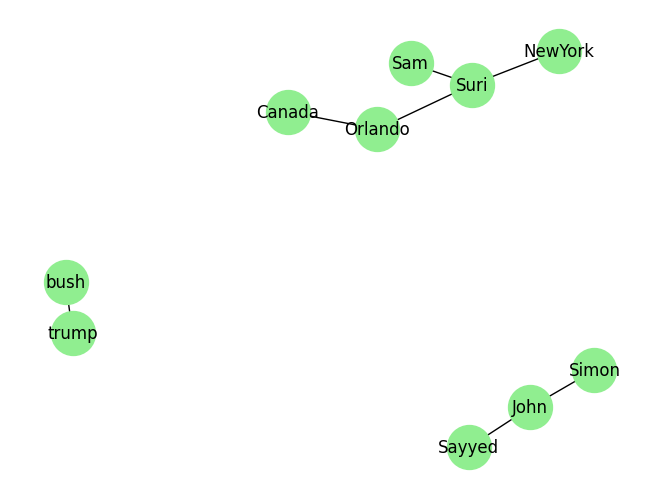

In [26]:
pos = nx.spring_layout(G, scale=20, k=2/np.sqrt(G.order()))
nx.draw(G, pos, node_color='lightgreen', node_size=1000, with_labels=True)

In [133]:
d = {
    "A": ["tango", "bravo", "alpha"],
    "B": ["bravo", "test"],
    "C": ["romero", "test"],
    "D": ["other"],
    "E": ["and", "other"],
    "F": ["loner"],
}

In [151]:
df = pd.DataFrame({'name' : ['a', 'a', 'b', 'b', 'c', 'd', 'd', 'e', 'e', 'g'],
                   'identifier' : [1, 3, 1, 2, 3, 4, 5, 5, 4, 6]})
df_grouped = df.groupby('name')['identifier'].unique().reset_index(name='identifier')
# df_grouped['identifier'] = df_grouped['identifier'].apply(lambda x: tuple(x))
dict(df_grouped.values)

{'a': array([1, 3]),
 'b': array([1, 2]),
 'c': array([3]),
 'd': array([4, 5]),
 'e': array([5, 4]),
 'g': array([6])}

In [165]:
def group_values(df_grouped_dict):
    #build combination of all keys pairwise
    #check for common values in the list
    d = df_grouped_dict.copy()
    G = nx.Graph()
    for nodes in itertools.combinations(d.keys(), r=2):
        common_edges = set(d[nodes[0]]) & set(d[nodes[1]])
        for edge in common_edges:
            G.add_edge(*nodes, value=edge)

    # get list with all connected keys (keys which have any common value)
    connected = list(nx.connected_components(G))
    print(connected)
    new_dict = {}
    for groups in connected:
        res = set()
        for key in groups:
            res.update(d[key])
        for key in groups:
            new_dict[key] = [list(res), list(groups)]
    for k, v in d.items():
        if not any([k in key for key in new_dict.keys()]):
            if type(d[k]) == np.ndarray:
                new_dict[k] = [d[k].tolist(), [k]]
            else:
                new_dict[k] = [d[k], [k]]
    return new_dict


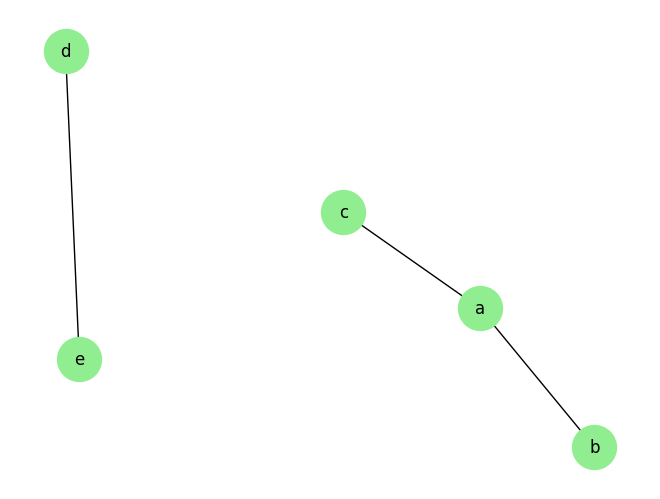

In [166]:
pos = nx.spring_layout(G, scale=20, k=2/np.sqrt(G.order()))
nx.draw(G, pos, node_color='lightgreen', node_size=1000, with_labels=True)

In [164]:
group_values(df_grouped_dict)

[{'c', 'b', 'a'}, {'d', 'e'}]


{'c': [[1, 2, 3], ['c', 'b', 'a']],
 'b': [[1, 2, 3], ['c', 'b', 'a']],
 'a': [[1, 2, 3], ['c', 'b', 'a']],
 'd': [[4, 5], ['d', 'e']],
 'e': [[4, 5], ['d', 'e']],
 'g': [[6], ['g']]}

In [160]:
type(df_grouped_dict['a']) == np.ndarray

True

In [127]:
new_dict = {}
for groups in connected:
    res = set()
    for key in groups:
        res.update(d[key])
    for key in groups:
        new_dict[key] = [list(res), list(groups)]
for k, v in d.items():
    if not any([k in key for key in new_dict.keys()]):
        new_dict[k] = [d[k].tolist(), [k]]

new_dict

{'c': [[1, 2, 3], ['c', 'b', 'a']],
 'b': [[1, 2, 3], ['c', 'b', 'a']],
 'a': [[1, 2, 3], ['c', 'b', 'a']],
 'd': [[4, 5], ['d', 'e']],
 'e': [[4, 5], ['d', 'e']],
 'g': [[6], ['g']]}

In [117]:
new_dict

{'c': [[1, 2, 3], ['c', 'b', 'a']],
 'b': [[1, 2, 3], ['c', 'b', 'a']],
 'a': [[1, 2, 3], ['c', 'b', 'a']],
 'd': [[4, 5], ['d', 'e']],
 'e': [[4, 5], ['d', 'e']],
 'g': array([6])}

In [ ]:
    # create new dict from "connected" with joined keys and joined values
    new_list = {}
    for groups in connected:
        res = set()
        for key in groups:
            res.update(d[key])
        new_list[groups] = list(res)
        # new_dict[f"{' , '.join(list(groups))}"] = res

    # check for elements in the original dictionary which aren't connected to anything and add them
    for k, v in d.items():
        if not any([k in key for key in new_dict.keys()]):
            new_dict[k] = d[k]